# Analysis of ABCtoolbox results

ABCtoolbox output includes:  
- retained simulations
- marginal posterior densities
- marginal posterior densities charecterisitcs
- joint posterior densities

In this Notebook, I:
- reformat the marginal posterior densities charecterisitcs file so it is easily readable
- plot a heatmap of the joint posterior densities
- calculate the probability NEA > NWA
- plot the marginal priors, truncated priors, and posterior denstities

## Setup code

In [2]:
import sys, os
sys.path.append('/mnt/src/ABC_results_AJ/')
print(sys.executable)
print(sys.version)
print(sys.version_info)
print(sys.path)

/opt/anaconda3/bin/python
3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 18:10:19) 
[GCC 7.2.0]
sys.version_info(major=3, minor=6, micro=4, releaselevel='final', serial=0)
['', '/opt/anaconda3/lib/python36.zip', '/opt/anaconda3/lib/python3.6', '/opt/anaconda3/lib/python3.6/lib-dynload', '/opt/anaconda3/lib/python3.6/site-packages', '/opt/anaconda3/lib/python3.6/site-packages/IPython/extensions', '/home/aglad/.ipython', '/mnt/src/ABC_results_AJ/']


In [3]:
%%bash
# sudo /opt/anaconda3/bin/conda install rpy2
# sudo /opt/anaconda3/bin/conda install -c conda-forge ggplot

In [4]:
from sys import argv
import pandas as pd
# from ggplot import *
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True, style="ticks")
import numpy as np
# import rpy2
# %load_ext rpy2.ipython

from functions.assessment_functions import *

## Functions

In [26]:
# def read_abc_config(abc_config_name):
#     """
#     Get input files used for ABC and results files output by ABC.
#     :param abc_config_name: The configuration file used to run ABCtoolbox 
#     :return: simName:
#     :return: obsName:
#     :return: outputPrefix:
#     """

#     simName = ""
#     obsName = ""
#     outputPrefix = ""

#     if os.path.isfile(abc_config_name):
#         print(abc_config_name)
#         abc_config = open(abc_config_name, 'r')
#         for line in abc_config:
#             line_lst = line.split()
#             arg = line_lst[0]
#             if arg == "simName":
#                 simName = line.split()[1]
#             if arg == "obsName":
#                 obsName = line.split()[1]
#             if arg == "outputPrefix":
#                 outputPrefix = line.split()[1]
#             if arg == "params":
#                 params_str = line.split()[1]
#         abc_config.close()
#     else:
#         print('{} does not exist'.format(abc_config_name))
#         exit()

#     if not simName:
#         print("simName not included in ABCtoolbox config file")
#         exit()
#     if not obsName:
#         print("obsName not included in ABCtoolbox config file")
#         exit()
#     if not outputPrefix:
#         print("outputPrefix not included in ABCtoolbox config file")
#         exit()

#     return [simName, obsName, outputPrefix, params_str]


# def get_results_files(outputPrefix):
#     """
#     Define names of ABCtoolbox estimate results files
#     :param outputPrefix: the output prefix provided in the ABCtoolbox config file
#     :return: names of ABCtoolbox output files
#     """

#     BestSimsParamStats_name = '{}model0_BestSimsParamStats_Obs0.txt'.format(outputPrefix)
#     MarginalPosteriorDensities_name = '{}model0_MarginalPosteriorDensities_Obs0.txt'.format(outputPrefix)
#     MarginalPosteriorCharacteristics_name = '{}model0_MarginalPosteriorCharacteristics.txt'.format(outputPrefix)
#     jointPosterior_name = '{}model0_jointPosterior_8_9_Obs0.txt'.format(outputPrefix)
#     MarginalPosteriorCharacteristics_reformat_name = '{}model0_MarginalPosteriorCharacteristicsReformat.txt'.format(outputPrefix)
#     modelFit_name = '{}modelFit.txt'.format(outputPrefix)

    
#     return [BestSimsParamStats_name,
#             MarginalPosteriorDensities_name,
#             MarginalPosteriorCharacteristics_name,
#             jointPosterior_name,
#             MarginalPosteriorCharacteristics_reformat_name,
#            modelFit_name]


# def get_modelchocie_files(outputPrefix):
#     """
#     Define names of ABCtoolbox model choice
#     :param outputPrefix: the output prefix provided in the ABCtoolbox config file
#     :return: names of ABCtoolbox output files
#     """
    
#     confusionMatrix_name = '{}confusionMatrix.txt'.format(outputPrefix)
#     modelChoiceValidation_name = '{}modelChoiceValidation.txt'.format(outputPrefix)
#     modelFit_name = '{}modelFit.txt'.format(outputPrefix)
    
#     return [confusionMatrix_name,
#            modelChoiceValidation_name,
#            modelFit_name]
    

# def reformat_Characteristics(MarginalPosteriorCharacteristics_name):
#     """
#     reformat the ABCtoolbox output file MarginalPosteriorCharacteristics to a table with parameter as the rows and
#      posterior density characteristics as columns.
#     :param MarginalPosteriorCharacteristics_name: file name of ABCtoolbox output file with characteristics of posterior
#     density.
#     :return: df_table: pandas dataframe with parameters as rows and posterior density characteristics as columns
#     """

#     characteristics = ['mode', 'mean', 'median', 'q50_lower', 'q50_upper', 'q90_lower', 'q90_upper', 'q95_lower', 'q95_upper',
#                   'q99_lower', 'q99_upper', 'HDI50_lower', 'HDI50_upper', 'HDI90_lower', 'HDI90_upper', 'HDI95_lower',
#                   'HDI95_upper', 'HDI99_lower', 'HDI99_upper']
#     n_chars = len(characteristics)

#     if os.path.isfile(MarginalPosteriorCharacteristics_name):
#         print('parsing {}'.format(MarginalPosteriorCharacteristics_name))

#         df = pd.read_csv(MarginalPosteriorCharacteristics_name, sep = '\t').drop('dataSet', 1)
#         header = list(df)

#         df_list = []
#         start = 0
#         for i in range(1, int(len(df.columns)/n_chars)):
#             param = header[start].split(characteristics[0])[0].strip('_')
#             df_param = df.loc[:, header[start]:header[start + n_chars - 1]]
#             df_param.columns = characteristics
#             df_param['param'] = param
#             df_param.set_index('param')
#             df_list.append(df_param)
#             start = n_chars * i
#         df_table = pd.concat(df_list)

#     else:
#         print('{} does not exist'.format(MarginalPosteriorCharacteristics_name))
#         print('Did you run ABCtoolbox in this directory?')
#         exit()

#     return df_table


# def get_param_indexes(params_str):
#     """
#     Convert string of parameter column numbers into list of ints
#     :param params_str: string of parameter column numbers from the ABCtoolbox config file, of the form: 1-5,9-12
#     :return: get_param_indexes: list of ints
#     """
#     param_indexes = []
#     ranges = params_str.split(',')
#     for values in ranges:
#         x = int(values.split('-')[0].strip()) - 1
#         y = int(values.split('-')[1].strip())
#         param_indexes.extend(list(range(x, y)))
#     return param_indexes


# def get_col_names(ints, df):
#     """
#     Get list of column names of a dataframe from list of ints
#     :param ints: list of integers
#     :param df: dataframe with column names
#     :return: names: list of column names
#     """
    
#     names = []
#     for i in ints:
#         names.append(list(df)[i])
#     return names


# def plot_param_densities(posterior, truncated, prior, df_chrs_reformat, param):
#     """
#     Use matplotlib and seaborn to plot prior, truncated, and posterior distributions of parameter.
#     :param posterior: dataframe of ABCtoolbox *MarginalPosteriorDensities_Obs0.txt
#     :param truncated: dataframe of ABCtoolbox *BestSimsParamStats_Obs0.txt
#     :param prior: dataframe of simulation input for ABCtoolbox
#     :param param: string parameter name, which is the column name in the dataframes
#     """
    
#     mode = float(df_chrs_reformat['mode'].loc[df_chrs_reformat['param'] == param])
#     HDI90_lower = float(df_chrs_reformat['HDI90_lower'].loc[df_chrs_reformat['param'] == param])
#     HDI90_upper = float(df_chrs_reformat['HDI90_upper'].loc[df_chrs_reformat['param'] == param])
    
#     plt.figure()
#     plt.xlabel(param);
#     plt.plot(posterior[param], posterior['{}.density'.format(param)], label = 'posterior');
#     sns.kdeplot(truncated[param], label = 'truncated prior');
#     sns.kdeplot(prior[param], color = 'grey', label = 'prior');
#     ymin, ymax = plt.ylim()
#     plt.vlines(mode, ymin, ymax, colors='black');
#     plt.vlines(HDI90_lower, ymin, ymax, colors='black', linestyle = 'dotted');
#     plt.vlines(HDI90_upper, ymin, ymax, colors='black', linestyle = 'dotted');
    
#     return


# def create_joint_df(jointPosterior_name):

#     if os.path.isfile(jointPosterior_name):
#         joint_NEA_NWA_df = pd.read_csv(jointPosterior_name, sep = '\t')
#     else:
#         print('{} does not exist'.format(jointPosterior_name))
#         print('Did you run ABCtoolbox in this directory?')
#         exit()
#     return joint_NEA_NWA_df


# def get_prob_NEA_grtr_NWA(joint_NEA_NWA_df):
#     total_density = sum(joint_NEA_NWA_df['density'])
#     NEA_grtr_density = joint_NEA_NWA_df[joint_NEA_NWA_df['Log10_NEA'] > joint_NEA_NWA_df['Log10_NWA']]['density']
#     prob = sum(NEA_grtr_density)/total_density
#     return prob


# def plot_joint_mtpltlb(joint_NEA_NWA_df, df_chrs_reformat):

#     # density map
#     NWA, NEA, z = joint_NEA_NWA_df['Log10_NWA'], joint_NEA_NWA_df['Log10_NEA'], joint_NEA_NWA_df['density']
#     NWA = np.unique(NWA)
#     NEA = np.unique(NEA)
#     X, Y = np.meshgrid(NWA, NEA)
#     Z = z.reshape(len(NEA), len(NWA))
#     plt.pcolormesh(X, Y, Z, cmap='viridis')
#     colorbar = plt.colorbar()
#     colorbar.set_label('Density')

#     # y = x line
#     plt.plot(NWA, NWA, color='black')

#     # Scatterplot point
#     NEA_mode = df_chrs_reformat.loc[df_chrs_reformat['param'] == 'Log10_NEA']['mode']
#     NWA_mode = df_chrs_reformat.loc[df_chrs_reformat['param'] == 'Log10_NWA']['mode']
#     plt.scatter(NWA_mode, NEA_mode, marker='*', facecolor='black', edgecolor='none')

#     # Axes limits and labels
#     plt.xlim(np.min(NWA), np.max(NWA))
#     plt.xlabel('$\log_{10}$ NWA')

#     plt.ylabel('$\log_{10}$ NEA')
#     plt.ylim(min(NEA), max(NEA))
#     plt.show()
#     return

## Create PCA and density plots of summary statistics

In [25]:
%%bash
if [ -e "/mnt/ABC_AJmodels_genome_newreal/input_ABC_HPC_OSG_CHTC_2_pca.pdf" ]; then
    echo "File exists"
else 
    head -1 /mnt/ABC_AJmodels_genome_newreal/input_ABC_HPC_OSG_CHTC_2.txt >/mnt/ABC_AJmodels_genome_newreal/header_M2.txt
    Rscript /mnt/src/macsswig_simsaj/dist_plot_stats.R /mnt/ABC_AJmodels_genome_newreal/input_ABC_HPC_OSG_CHTC_2.txt /mnt/ABC_AJmodels_genome_newreal/real_output_M23_IBD.txt /mnt/ABC_AJmodels_genome_newreal/header_M2.txt
fi 

[1] "/mnt/ABC_AJmodels_genome_newreal/input_ABC_HPC_OSG_CHTC_2.txt"
[2] "/mnt/ABC_AJmodels_genome_newreal/real_output_M23_IBD.txt"     
[3] "/mnt/ABC_AJmodels_genome_newreal/header_M2.txt"               


Error in scan(file = file, what = what, sep = sep, quote = quote, dec = dec,  : 
  line 39034 did not have 355 elements
Calls: read.table -> scan
Execution halted


In [ ]:
%%bash
ls /mnt/ABC_AJmodels_genome_newreal/*pdf

## Correlated Stats Pruned

### Model 2

In [ ]:
path = '/mnt/ABC_AJmodels_genome_newreal'
os.chdir(path)
abc_config_name = "test_ABC_estimate.txt"

[simName, obsName, outputPrefix, params_str] = read_abc_config(abc_config_name)
print(simName)

[BestSimsParamStats_name,
 MarginalPosteriorDensities_name,
 MarginalPosteriorCharacteristics_name,
 jointPosterior_name,
 MarginalPosteriorCharacteristics_reformat_name,
modelFit_name] = get_results_files(outputPrefix)
print(BestSimsParamStats_name)
print(MarginalPosteriorDensities_name)
print(jointPosterior_name)
print(MarginalPosteriorCharacteristics_reformat_name)
print(modelFit_name)

#### Reformat marginal posterior densities charecterisitcs file

In [ ]:
df_chrs_reformat = reformat_Characteristics(MarginalPosteriorCharacteristics_name)
df_chrs_reformat

#### Priors, truncated, and posterior distributions

In [ ]:
prior = pd.read_csv(simName, sep = '\t')
prior.head()

In [ ]:
truncated = pd.read_csv(BestSimsParamStats_name, sep = '\t')
truncated.head()

In [ ]:
posterior = pd.read_csv(MarginalPosteriorDensities_name, sep = '\t')
posterior.head()

In [ ]:
param_indexes = get_param_indexes(params_str)
params = get_col_names(param_indexes, prior)

In [ ]:
for param in params:
    plot_param_densities(posterior, truncated, prior, param)

#### Joint density plot

Create joint density dataframe

In [ ]:
joint_NEA_NWA_df = create_joint_df(jointPosterior_name)
joint_NEA_NWA_df.head()

In [ ]:
prob = get_prob_NEA_grtr_NWA(joint_NEA_NWA_df)
print(prob)

In [ ]:
plot_joint_mtpltlb(joint_NEA_NWA_df, df_chrs_reformat)

## PLS
data and results in `/mnt/ABC_AJmodels_genome_newreal/PLS`

In [34]:
path = '/mnt/ABC_AJmodels_genome_newreal/PLS'
os.chdir(path)
abc_config_name = "test_ABC_estimate_PLS.txt"

[simName, obsName, outputPrefix, params_str] = read_abc_config(abc_config_name)
print(simName)

[BestSimsParamStats_name,
 MarginalPosteriorDensities_name,
 MarginalPosteriorCharacteristics_name,
 jointPosterior_name,
 MarginalPosteriorCharacteristics_reformat_name,
modelFit_name] = get_results_files(outputPrefix)
print(BestSimsParamStats_name)
print(MarginalPosteriorDensities_name)
print(jointPosterior_name)
print(MarginalPosteriorCharacteristics_reformat_name)

test_ABC_estimate_PLS.txt
input_ABC_HPC_OSG_CHTC_2_transformed_10pls.txt
ABC_M2_genome_estimate_96334_10pls_1000ret_model0_BestSimsParamStats_Obs0.txt
ABC_M2_genome_estimate_96334_10pls_1000ret_model0_MarginalPosteriorDensities_Obs0.txt
ABC_M2_genome_estimate_96334_10pls_1000ret_model0_jointPosterior_8_9_Obs0.txt
ABC_M2_genome_estimate_96334_10pls_1000ret_model0_MarginalPosteriorCharacteristicsReformat.txt


#### Reformat marginal posterior densities charecterisitcs file

In [15]:
df_chrs_reformat = reformat_Characteristics(MarginalPosteriorCharacteristics_name)
df_chrs_reformat

parsing ABC_M2_genome_estimate_96334_10pls_1000ret_model0_MarginalPosteriorCharacteristics.txt


/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,mode,mean,median,q50_lower,q50_upper,q90_lower,q90_upper,q95_lower,q95_upper,q99_lower,q99_upper,HDI50_lower,HDI50_upper,HDI90_lower,HDI90_upper,HDI95_lower,HDI95_upper,HDI99_lower,HDI99_upper,param
0,18.363600,14.665200,15.168800,12.585700,17.702200,6.322070,19.480000,4.964500,19.729200,3.218940,19.943600,14.908300,19.727300,9.257390,20.000000,6.322070,20.000000,3.829220,20.000000,Asc_NAF
0,3.090910,9.711350,9.954250,5.117520,13.972900,2.618170,17.355000,2.314680,18.295600,2.064430,19.514700,2.000000,9.954250,2.000000,16.144300,2.000000,17.355000,2.000000,19.134600,Asc_NEU
0,5.090910,6.558800,5.933600,4.109110,8.113250,2.493160,13.980000,2.255380,15.592800,2.052910,17.987000,3.049940,6.818180,2.000000,11.336800,2.000000,13.980000,2.000000,17.116900,Asc_NCHB
0,0.093434,0.091075,0.091684,0.087299,0.095603,0.080442,0.099009,0.077655,0.099492,0.070549,0.099895,0.089646,0.097672,0.083181,0.099999,0.080442,0.099999,0.073651,0.099999,daf
0,4.724240,4.553040,4.578020,4.387290,4.748990,4.098940,4.910290,4.012990,4.945480,3.840330,4.986050,4.474150,4.822720,4.166160,4.954670,4.093100,4.993420,3.908590,4.999990,Log10_NAF
0,4.797980,4.656780,4.706530,4.519460,4.842100,4.150320,4.961510,4.039000,4.979940,3.830730,4.995790,4.665550,4.949490,4.290420,5.000000,4.150320,5.000000,3.915500,5.000000,Log10_NCEU
0,3.707070,3.763640,3.746830,3.611440,3.901080,3.432100,4.152210,3.375390,4.232170,3.264710,4.384040,3.575750,3.860570,3.414140,4.129980,3.353530,4.207190,3.252520,4.369530,Log10_NCHB
0,5.840450,5.181880,5.258350,4.510460,5.890420,3.718350,6.428830,3.483400,6.542990,3.159400,6.663040,4.979430,6.307560,3.914530,6.569140,3.699470,6.681250,3.266590,6.699930,Log10_NWA
0,6.318170,5.620110,5.840050,5.024820,6.277670,4.188280,6.575550,4.100630,6.630260,4.021900,6.684040,5.803210,6.659070,4.342240,6.686340,4.188280,6.699980,4.042810,6.699980,Log10_NEA
0,3.393740,3.417830,3.413510,3.074240,3.755990,2.618020,4.230330,2.479380,4.382290,2.230960,4.690280,3.060740,3.742170,2.594970,4.206750,2.443360,4.346120,2.209060,4.660700,Log10_NAg


#### Priors, truncated, and posterior distributions

In [16]:
prior_pls = pd.read_csv(simName, sep = '\t')
prior_pls.head()

,sim,Asc_NAF,Asc_NEU,Asc_NCHB,daf,Log10_NAF,Log10_NANC,Log10_NCEU,Log10_NCHB,Log10_NWA,...,LinearCombination_0,LinearCombination_1,LinearCombination_2,LinearCombination_3,LinearCombination_4,LinearCombination_5,LinearCombination_6,LinearCombination_7,LinearCombination_8,LinearCombination_9
0,1027430.0,18,15,17,0.063976,4.07809,3.80195,3.35102,4.51846,5.00670,...,-3.24385,-2.92342,-2.12947,-2.575080,1.12293,0.956623,0.615963,-0.942135,-1.29454,0.678204
1,1027430.0,16,20,8,0.074399,4.75215,4.02309,4.96067,4.28513,5.05156,...,-10.32210,7.78496,-2.73008,-3.513680,-1.98929,1.432610,-0.763788,2.076480,-2.76173,0.469587
2,1027430.0,11,13,8,0.060090,4.52791,4.39340,4.61965,4.70173,5.03003,...,13.42980,10.68570,4.45857,0.487421,4.84201,-4.931780,-2.188600,-2.454990,2.11956,-0.369664
3,1027430.0,13,7,5,0.077346,4.03997,4.01229,3.68124,3.17348,3.55437,...,10.61930,-4.29706,2.54018,-0.158184,3.88781,1.448610,4.165740,2.296540,2.47995,0.026251
4,1027430.0,13,17,9,0.077928,4.54010,4.52481,3.12840,3.36436,5.45016,...,-19.95690,-2.82774,-1.02644,-4.407730,-2.53827,2.839090,2.780910,-1.218650,3.58499,-0.407411


In [17]:
truncated_pls = pd.read_csv(BestSimsParamStats_name, sep = '\t')
truncated_pls.head()

,Sim_num,Dist,Asc_NAF,Asc_NEU,Asc_NCHB,daf,Log10_NAF,Log10_NCEU,Log10_NCHB,Log10_NWA,...,LinearCombination_0,LinearCombination_1,LinearCombination_2,LinearCombination_3,LinearCombination_4,LinearCombination_5,LinearCombination_6,LinearCombination_7,LinearCombination_8,LinearCombination_9
0,32,11.9767,5,5,5,0.068311,4.60141,3.83803,3.72542,5.13338,...,-14.1509,1.58473,-2.70297,-4.76552,-3.03661,3.96135,3.351960,1.64289,-0.240781,-1.024150
1,44,30.9672,17,3,12,0.094569,4.13293,4.43685,4.34044,6.32371,...,-8.4300,1.28672,-3.92734,-1.90704,-1.30004,2.79232,3.271970,2.59049,-1.857660,-1.593530
2,99,32.2504,17,16,10,0.096923,4.41180,4.54911,4.06100,4.29909,...,-14.0772,1.54763,-3.30219,-2.77118,-2.71928,1.39698,0.123887,1.51073,-0.601559,-1.453430
3,115,20.4209,5,5,6,0.090136,4.37842,4.72775,3.68043,6.13776,...,-14.6503,4.31167,-2.80982,-4.67220,-3.41754,3.35661,1.807860,2.14078,-0.793186,-1.059040
4,124,25.0922,19,7,9,0.087624,4.39801,4.99303,3.92778,3.64758,...,-12.3235,2.37149,-5.23194,-2.20384,-2.75268,2.16104,1.284960,3.14721,-2.177180,0.267372


In [18]:
posterior_pls = pd.read_csv(MarginalPosteriorDensities_name, sep = '\t')
posterior_pls.head()

,number,Asc_NAF,Asc_NAF.density,Asc_NEU,Asc_NEU.density,Asc_NCHB,Asc_NCHB.density,daf,daf.density,Log10_NAF,...,Teu_as,Teu_as.density,TA,TA.density,TMJ,TMJ.density,TAEW,TAEW.density,Tm,Tm.density
0,1,2.00000,0.002190,2.00000,0.077599,2.00000,0.094509,0.050000,0.005047,3.70001,...,404.000,0.001276,20.0000,0.016799,21.000,0.002996,2.00000,0.013878,3.00000,0.005285
1,2,2.18182,0.002638,2.18182,0.079860,2.18182,0.099761,0.050505,0.006200,3.71314,...,441.293,0.001322,20.1616,0.017715,32.899,0.003078,2.32323,0.014772,3.32323,0.005793
2,3,2.36364,0.003152,2.36364,0.081656,2.36364,0.104744,0.051010,0.007558,3.72627,...,478.586,0.001358,20.3232,0.018603,44.798,0.003137,2.64646,0.015665,3.64646,0.006297
3,4,2.54545,0.003739,2.54545,0.082989,2.54545,0.109416,0.051515,0.009145,3.73940,...,515.879,0.001382,20.4848,0.019462,56.697,0.003172,2.96970,0.016562,3.96970,0.006792
4,5,2.72727,0.004399,2.72727,0.083873,2.72727,0.113750,0.052020,0.010986,3.75253,...,553.172,0.001395,20.6465,0.020292,68.596,0.003183,3.29293,0.017467,4.29293,0.007270


In [19]:
param_indexes = get_param_indexes(params_str)
params = get_col_names(param_indexes, prior_pls)

TypeError: cannot convert the series to <class 'float'>

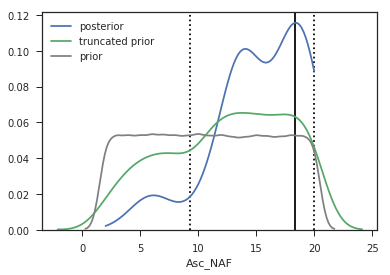

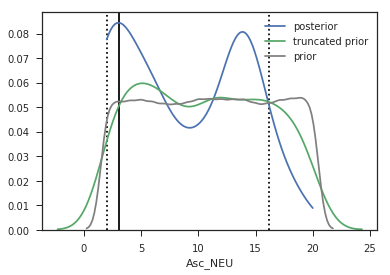

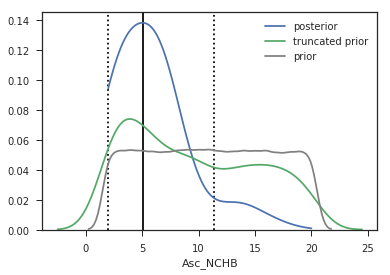

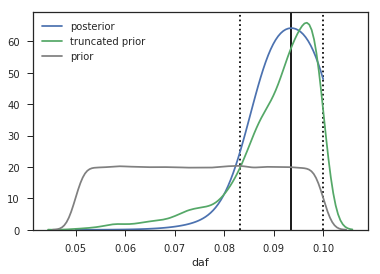

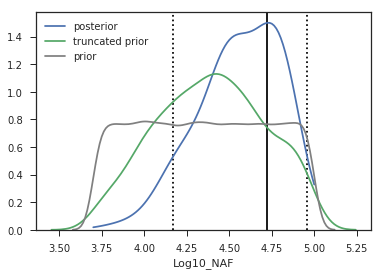

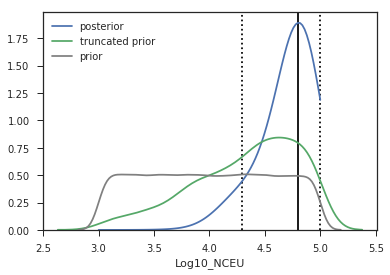

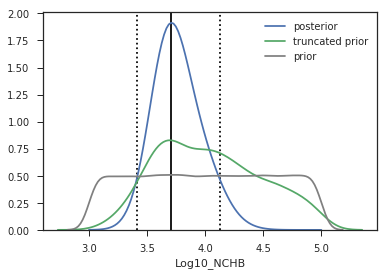

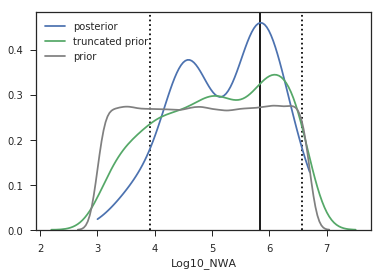

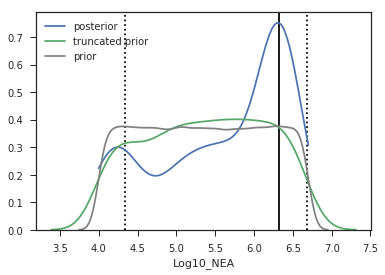

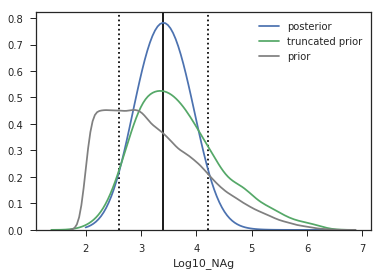

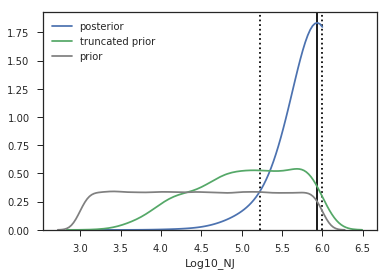

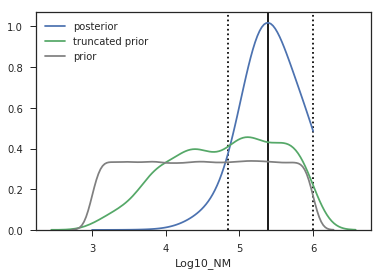

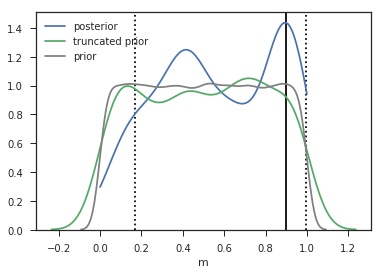

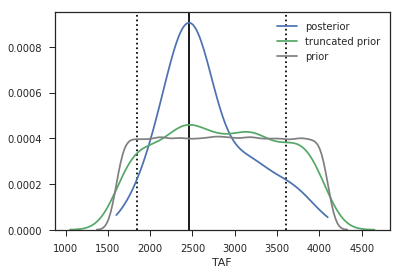

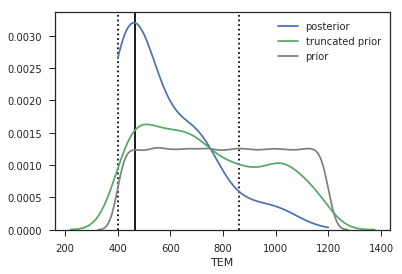

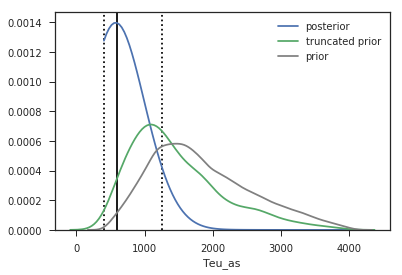

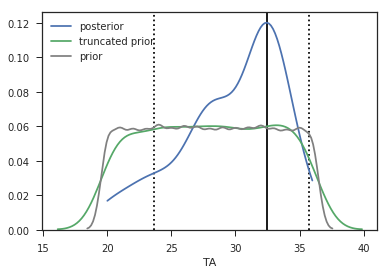

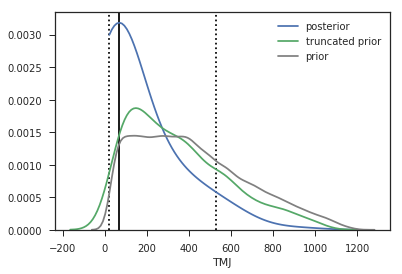

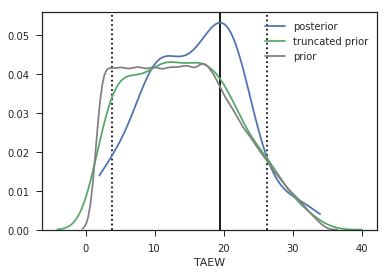

In [28]:
for param in params:
    plot_param_densities(posterior_pls, truncated_pls, prior_pls, df_chrs_reformat, param)

#### Joint density plot

Create joint density dataframe

In [21]:
joint_NEA_NWA_df_pls = create_joint_df(jointPosterior_name)
joint_NEA_NWA_df_pls.head()

,number,Log10_NWA,Log10_NEA,density,HDI
0,0,3.00043,4.00004,0.557281,0.999800
1,1,3.03780,4.00004,0.609844,0.999625
2,2,3.07517,4.00004,0.662231,0.999403
3,3,3.11254,4.00004,0.713823,0.999196
4,4,3.14990,4.00004,0.764061,0.998909


In [22]:
prob = get_prob_NEA_grtr_NWA(joint_NEA_NWA_df_pls)
print(prob)

0.6382405627050782


/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:195: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


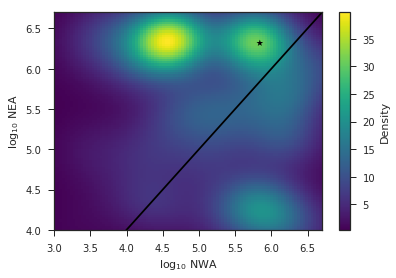

In [23]:
plot_joint_mtpltlb(joint_NEA_NWA_df_pls, df_chrs_reformat)

## PLS Reduced Params
data and results in `/mnt/ABC_AJmodels_genome_newreal/PLS`

In [5]:
path = '/mnt/ABC_AJmodels_genome_newreal/PLS/ReduceParams'
os.chdir(path)
abc_config_name = "test_ABC_estimate_PLS.txt"

[simName, obsName, outputPrefix, params_str] = read_abc_config(abc_config_name)
print(simName)

[BestSimsParamStats_name,
 MarginalPosteriorDensities_name,
 MarginalPosteriorCharacteristics_name,
 jointPosterior_name,
 MarginalPosteriorCharacteristics_reformat_name,
modelFit] = get_results_files(outputPrefix)
jointPosterior_name = '{}model0_jointPosterior_1_2_Obs0.txt'.format(outputPrefix)
print(BestSimsParamStats_name)
print(MarginalPosteriorDensities_name)
print(jointPosterior_name)
print(MarginalPosteriorCharacteristics_reformat_name)

test_ABC_estimate_PLS.txt
../input_ABC_HPC_OSG_CHTC_2_transformed_10pls.txt
ABC_M2_genome_estimate_96334_10pls_1000ret_model0_BestSimsParamStats_Obs0.txt
ABC_M2_genome_estimate_96334_10pls_1000ret_model0_MarginalPosteriorDensities_Obs0.txt
ABC_M2_genome_estimate_96334_10pls_1000ret_model0_jointPosterior_1_2_Obs0.txt
ABC_M2_genome_estimate_96334_10pls_1000ret_model0_MarginalPosteriorCharacteristicsReformat.txt


#### Reformat marginal posterior densities charecterisitcs file

In [7]:
df_chrs_reformat_pls = reformat_Characteristics(MarginalPosteriorCharacteristics_name)
df_chrs_reformat_pls

parsing ABC_M2_genome_estimate_96334_10pls_1000ret_model0_MarginalPosteriorCharacteristics.txt


/mnt/src/ABC_results_AJ/functions/assessment_functions.py:152: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_param['param'] = param


,mode,mean,median,q50_lower,q50_upper,q90_lower,q90_upper,q95_lower,q95_upper,q99_lower,q99_upper,HDI50_lower,HDI50_upper,HDI90_lower,HDI90_upper,HDI95_lower,HDI95_upper,HDI99_lower,HDI99_upper,param
0,5.018340,4.956800,4.963260,4.20890,5.71772,3.442140,6.422600,3.274550,6.544260,3.074010,6.664340,4.177540,5.686310,3.542280,6.511430,3.392800,6.642520,3.134830,6.699930,Log10_NWA
0,5.500010,5.363570,5.379160,4.75500,5.97611,4.185810,6.508080,4.100460,6.592870,4.021970,6.675650,4.968200,6.183580,4.200790,6.522710,4.095490,6.587750,4.013680,6.666530,Log10_NEA
0,3.347280,3.366130,3.354550,3.03080,3.68863,2.587720,4.183140,2.451000,4.346750,2.209740,4.678330,2.998840,3.655730,2.567360,4.160290,2.441350,4.335100,2.166770,4.624870,Log10_NAg
0,5.909080,5.580980,5.646810,5.39069,5.83050,4.918190,5.965420,4.744160,5.982540,4.392540,5.996490,5.628770,5.984840,5.107410,5.999990,4.918190,5.999990,4.534600,5.999990,Log10_NJ
0,5.757500,5.411830,5.482290,5.14758,5.74048,4.597950,5.942890,4.409640,5.970800,4.028040,5.993950,5.467960,5.984770,4.811390,5.999920,4.597950,5.999920,4.185760,5.999920,Log10_NM
0,0.838374,0.525542,0.547245,0.27994,0.77056,0.066119,0.942524,0.035842,0.968851,0.007854,0.993152,0.500598,0.944433,0.089678,0.964635,0.052694,0.984837,0.015349,0.999988,m
0,480.808000,626.756000,586.087000,492.76400,718.83500,420.868000,1004.100000,410.741000,1071.260000,402.217000,1157.270000,404.061000,589.899000,400.000000,898.321000,400.000000,1004.100000,400.000000,1128.990000,TEM
0,23.393900,27.895000,27.758600,23.87740,31.98740,20.910800,35.037800,20.478800,35.486700,20.101600,35.889600,20.888900,28.567800,20.823900,34.949500,20.404000,35.408300,20.080800,35.864000,TA
0,163.788000,294.126000,262.023000,147.28300,409.67300,50.779300,663.529000,36.422500,751.777000,24.209200,922.148000,62.646500,298.805000,21.000000,564.485000,21.000000,663.529000,21.000000,854.695000,TMJ
0,14.606100,15.815600,15.367000,9.77508,21.29280,4.224170,29.479300,3.236800,31.380400,2.278250,33.369000,8.527560,19.939400,2.484850,27.064100,2.000000,29.479300,2.000000,32.806900,TAEW


#### Priors, truncated, and posterior distributions

In [8]:
prior_pls = pd.read_csv(simName, sep = '\t')
prior_pls.head()

,sim,Asc_NAF,Asc_NEU,Asc_NCHB,daf,Log10_NAF,Log10_NANC,Log10_NCEU,Log10_NCHB,Log10_NWA,...,LinearCombination_0,LinearCombination_1,LinearCombination_2,LinearCombination_3,LinearCombination_4,LinearCombination_5,LinearCombination_6,LinearCombination_7,LinearCombination_8,LinearCombination_9
0,1027430.0,18,15,17,0.063976,4.07809,3.80195,3.35102,4.51846,5.00670,...,-3.24385,-2.92342,-2.12947,-2.575080,1.12293,0.956623,0.615963,-0.942135,-1.29454,0.678204
1,1027430.0,16,20,8,0.074399,4.75215,4.02309,4.96067,4.28513,5.05156,...,-10.32210,7.78496,-2.73008,-3.513680,-1.98929,1.432610,-0.763788,2.076480,-2.76173,0.469587
2,1027430.0,11,13,8,0.060090,4.52791,4.39340,4.61965,4.70173,5.03003,...,13.42980,10.68570,4.45857,0.487421,4.84201,-4.931780,-2.188600,-2.454990,2.11956,-0.369664
3,1027430.0,13,7,5,0.077346,4.03997,4.01229,3.68124,3.17348,3.55437,...,10.61930,-4.29706,2.54018,-0.158184,3.88781,1.448610,4.165740,2.296540,2.47995,0.026251
4,1027430.0,13,17,9,0.077928,4.54010,4.52481,3.12840,3.36436,5.45016,...,-19.95690,-2.82774,-1.02644,-4.407730,-2.53827,2.839090,2.780910,-1.218650,3.58499,-0.407411


In [9]:
truncated_pls = pd.read_csv(BestSimsParamStats_name, sep = '\t')
truncated_pls.head()

,Sim_num,Dist,Log10_NWA,Log10_NEA,Log10_NAg,Log10_NJ,Log10_NM,m,TEM,TA,...,LinearCombination_0,LinearCombination_1,LinearCombination_2,LinearCombination_3,LinearCombination_4,LinearCombination_5,LinearCombination_6,LinearCombination_7,LinearCombination_8,LinearCombination_9
0,32,11.9767,5.13338,6.01778,4.47740,5.59002,4.63875,0.673279,954,23,...,-14.1509,1.58473,-2.70297,-4.76552,-3.03661,3.96135,3.351960,1.64289,-0.240781,-1.024150
1,44,30.9672,6.32371,6.47979,3.42095,4.50133,5.38934,0.929391,900,21,...,-8.4300,1.28672,-3.92734,-1.90704,-1.30004,2.79232,3.271970,2.59049,-1.857660,-1.593530
2,99,32.2504,4.29909,4.51865,3.43712,4.18018,4.91524,0.369793,751,28,...,-14.0772,1.54763,-3.30219,-2.77118,-2.71928,1.39698,0.123887,1.51073,-0.601559,-1.453430
3,115,20.4209,6.13776,5.29750,4.86074,5.50318,4.61322,0.530676,792,28,...,-14.6503,4.31167,-2.80982,-4.67220,-3.41754,3.35661,1.807860,2.14078,-0.793186,-1.059040
4,124,25.0922,3.64758,6.29626,3.35468,5.28474,4.54974,0.612882,818,25,...,-12.3235,2.37149,-5.23194,-2.20384,-2.75268,2.16104,1.284960,3.14721,-2.177180,0.267372


In [10]:
posterior_pls = pd.read_csv(MarginalPosteriorDensities_name, sep = '\t')
posterior_pls.head()

,number,Log10_NWA,Log10_NWA.density,Log10_NEA,Log10_NEA.density,Log10_NAg,Log10_NAg.density,Log10_NJ,Log10_NJ.density,Log10_NM,...,TEM,TEM.density,TA,TA.density,TMJ,TMJ.density,TAEW,TAEW.density,Tm,Tm.density
0,1,3.00043,0.060433,4.00004,0.222362,2.00000,0.011478,3.00000,3.192980e-07,3.00000,...,400.000,0.002255,20.0000,0.048732,21.000,0.001558,2.00000,0.017341,3.00000,0.002342
1,2,3.03780,0.067960,4.02731,0.237374,2.04646,0.015626,3.03030,4.707150e-07,3.03030,...,408.081,0.002371,20.1616,0.051178,32.899,0.001661,2.32323,0.018841,3.32323,0.002665
2,3,3.07517,0.075973,4.05458,0.251821,2.09292,0.021013,3.06061,6.879720e-07,3.06060,...,416.162,0.002477,20.3232,0.053451,44.798,0.001758,2.64646,0.020351,3.64646,0.003017
3,4,3.11254,0.084446,4.08186,0.265560,2.13937,0.027915,3.09091,9.970280e-07,3.09091,...,424.242,0.002571,20.4848,0.055543,56.697,0.001848,2.96970,0.021860,3.96970,0.003398
4,5,3.14990,0.093348,4.10913,0.278470,2.18583,0.036637,3.12121,1.432990e-06,3.12121,...,432.323,0.002653,20.6465,0.057449,68.596,0.001930,3.29293,0.023354,4.29293,0.003808


In [11]:
param_indexes = get_param_indexes(params_str)
print(param_indexes)
params = get_col_names(param_indexes, prior_pls)

[9, 10, 11, 12, 13, 14, 17, 19, 20, 21, 22]


TypeError: cannot convert the series to <class 'float'>

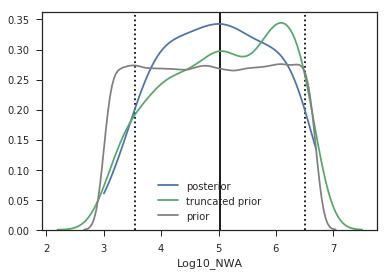

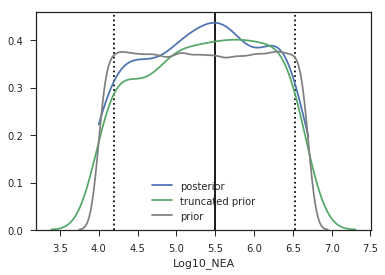

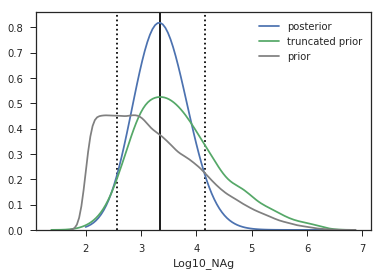

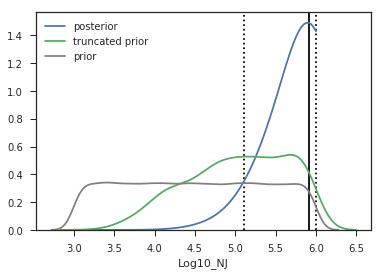

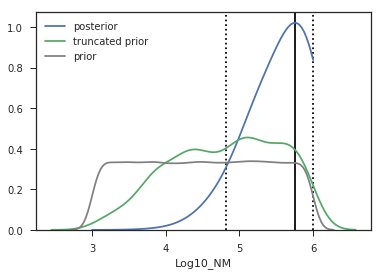

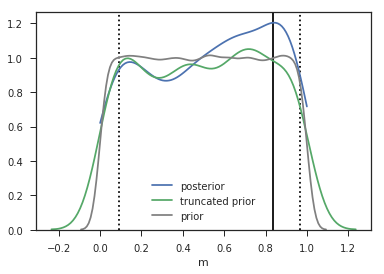

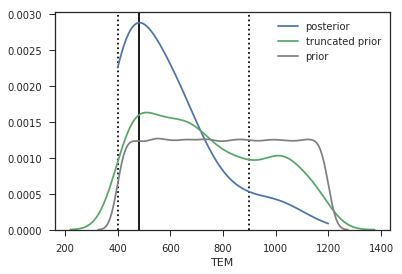

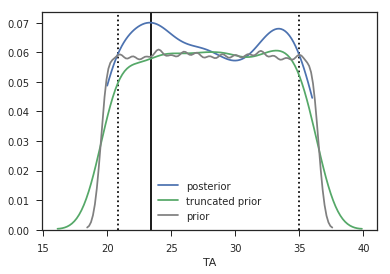

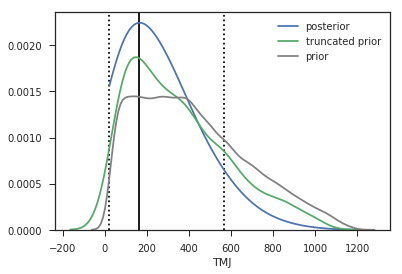

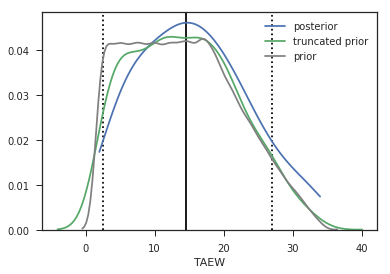

In [12]:
for param in params:
    plot_param_densities(posterior_pls, truncated_pls, prior_pls, df_chrs_reformat_pls, param)